In [387]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from zipfile import ZipFile
import os
import seaborn as sns

pd.options.mode.chained_assignment = None

In [388]:
# specifiy location of data
df = pd.read_csv("/home/rthoms/ocean_dep/sur_B/capture_table_clean.csv")


df.pract_cat = pd.Categorical(df.pract_cat,categories=["fish","shrimp_net","glean"],ordered=True)
df.scientific = pd.Categorical(df.scientific,categories=['Sillago sihama', 'Gerres oyena', 
                                                        'Gerres longirostris','Teraponidae', 
                                                        'Crenidens crenidens', 'Caranginae',
                                                        'Rastrellinger kanagurta', 'Portunus pelagicus', 
                                                        'scylla serrata ','Penaeus monodon', 'Loliginidae', 
                                                        'Penaeidae', 'Pinna muricata','Margaritidae', 
                                                        'Tapes literatus', 'Siliqua polita', 'Solenidae',
                                                        'Garfarium pectinatum', 'Serratina capsoides', 
                                                        'Callista florida','Potamididae', 'Volema pyrum'],ordered=True)

df.drop('Unnamed: 0', axis=1, inplace=True)

In [389]:
sample_dict={'fish': 44, 'glean': 32, 'shrimp_net': 32, 'f':57, 'm':70}


In [390]:
df = df.rename(columns={'pract_cat': 'Capture Method', 'seagrass': 'Seagrass Association'})
df['Seagrass Association']=df['Seagrass Association'].map({0: 'none', 1:'partial', 2:'full',})
df['Seagrass Association']= pd.Categorical(df['Seagrass Association'],categories=["none","partial","full"],ordered=True)

print(list(df['Seagrass Association'].unique()))

['none', 'partial', 'full']


In [391]:
def weighted_av(pract,med, count):
    sample_size=sample_dict[pract]
    wa= med*(int(count)/sample_size)
    return wa

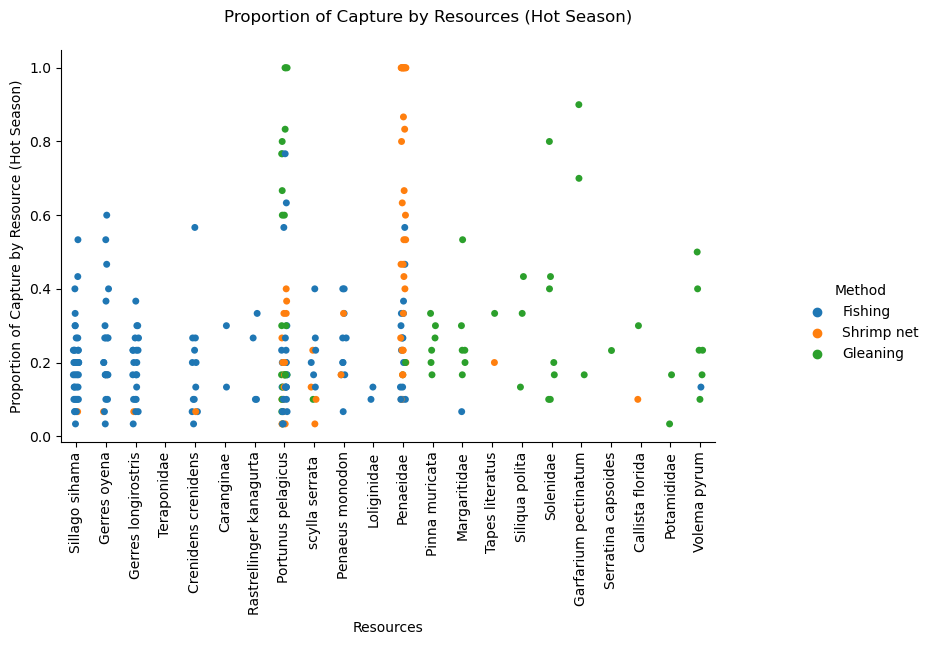

In [392]:
ax= sns.catplot(data=df, x="scientific", y="prop_cap_hot", hue="Capture Method")
ax.fig.set_size_inches(10,5)
ax.set_xticklabels(rotation=90)

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Proportion of Capture by Resources (Hot Season)')
ax.set_xlabels("Resources")
ax.set_ylabels("Proportion of Capture by Resource (Hot Season)")
ax.legend.set_title('Method')
ax.legend.get_texts()[0].set_text('Fishing')
ax.legend.get_texts()[1].set_text('Shrimp net')
ax.legend.get_texts()[2].set_text('Gleaning')

In [393]:
df_agg = df.groupby(['scientific','Capture Method']).agg(med_hot=('prop_cap_hot', np.median), med_cold=('prop_cap_cold', np.median),count = ('id', 'count'), Seagrass_Association= ('Seagrass Association', 'first')).reset_index() 
df_agg['weighted_av_hot'] = df_agg.apply(lambda row: weighted_av(row['Capture Method'], row['med_hot'],  row['count']), axis=1)
df_agg['weighted_av_cold'] = df_agg.apply(lambda row: weighted_av(row['Capture Method'], row['med_cold'],  row['count']), axis=1)

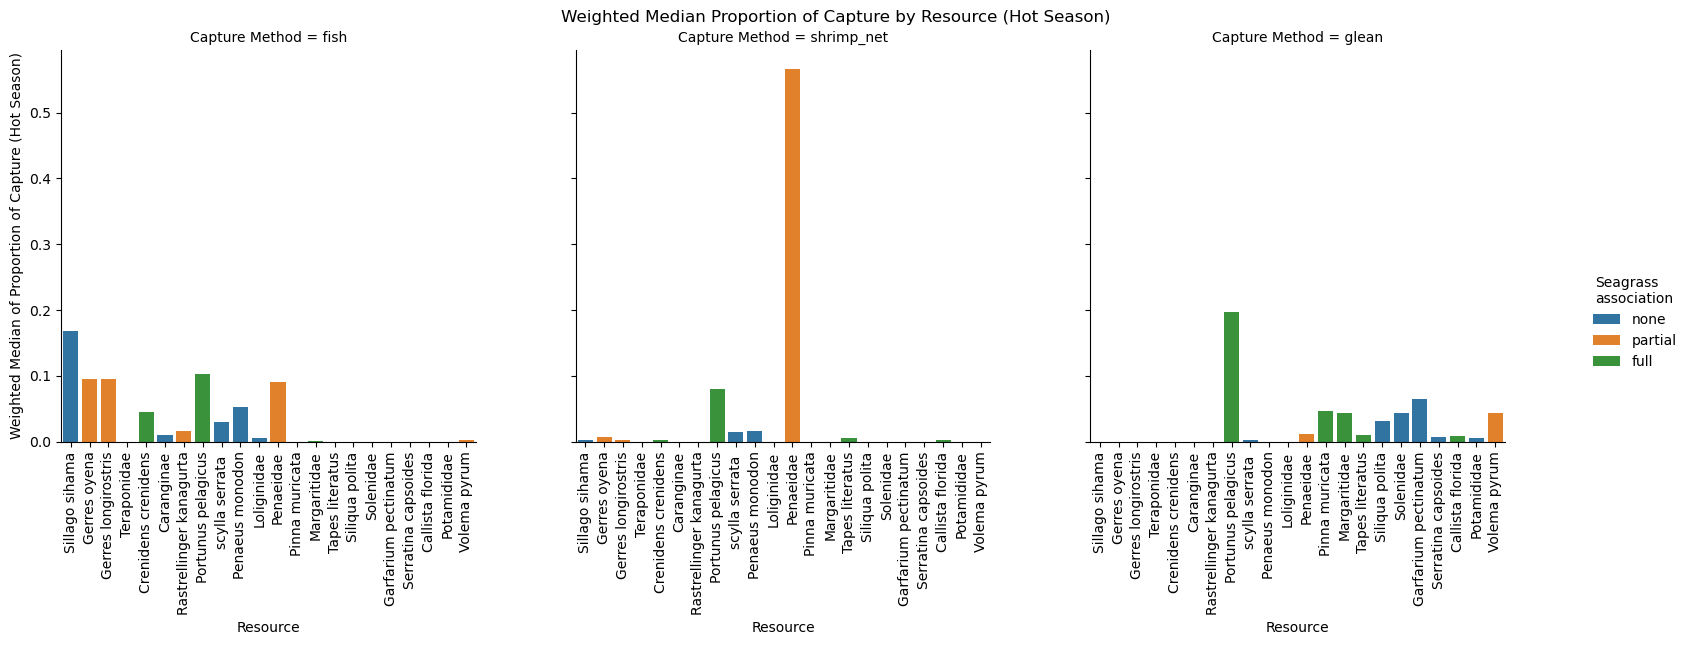

In [394]:
ax= sns.catplot(data=df_agg.sort_values(['scientific','Capture Method']), x="scientific", y="weighted_av_hot", kind = 'bar', col = 'Capture Method', hue = 'Seagrass_Association', dodge=False )
ax.fig.set_size_inches(17,5)
ax.set_xticklabels(rotation=90)

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Weighted Median Proportion of Capture by Resource (Hot Season)')
ax.set_xlabels("Resource")
ax.set_ylabels("Weighted Median of Proportion of Capture (Hot Season)")
ax.legend.set_title('Seagrass\nassociation')


ax.savefig("income/income_res_bar_plot.png") 

## Income

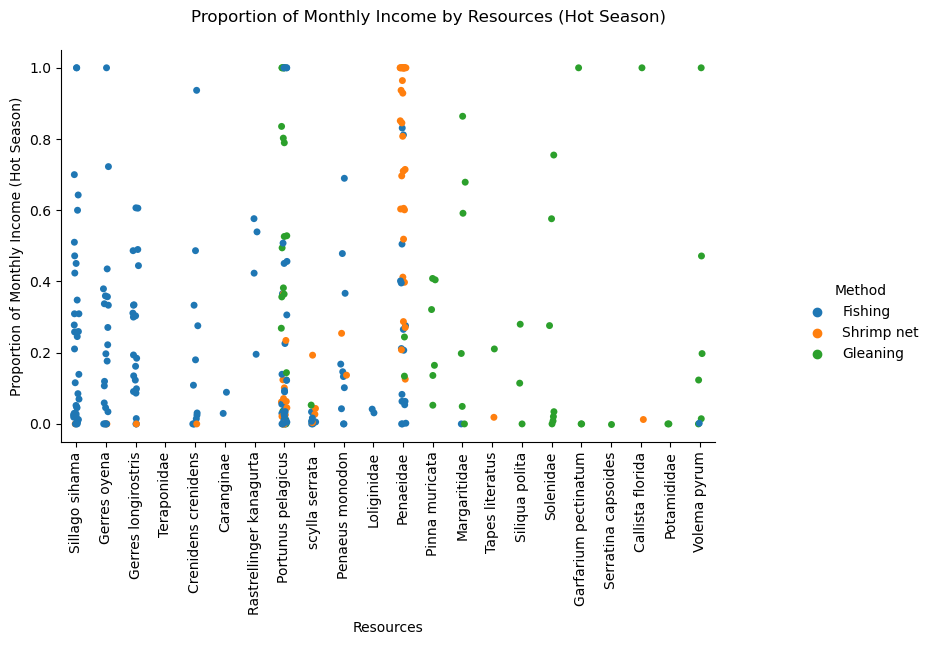

In [395]:
ax= sns.catplot(data=df, x="scientific", y="prop_income_hot", hue="Capture Method")
ax.fig.set_size_inches(10,5)
ax.set_xticklabels(rotation=90)

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Proportion of Monthly Income by Resources (Hot Season)')
ax.set_xlabels("Resources")
ax.set_ylabels("Proportion of Monthly Income (Hot Season)")
ax.legend.set_title('Method')
ax.legend.get_texts()[0].set_text('Fishing')
ax.legend.get_texts()[1].set_text('Shrimp net')
ax.legend.get_texts()[2].set_text('Gleaning')


ax.savefig("income/income_resource_scat_plot.png") 

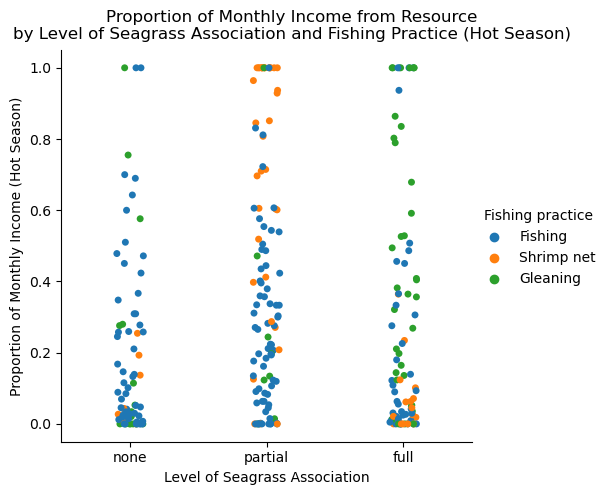

In [396]:
ax= sns.catplot(data=df.sort_values('Seagrass Association') , x="Seagrass Association", y="prop_income_hot", hue="Capture Method")

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Proportion of Monthly Income from Resource\nby Level of Seagrass Association and Fishing Practice (Hot Season)')
ax.set_xlabels("Level of Seagrass Association")
ax.set_ylabels("Proportion of Monthly Income (Hot Season)")
ax.legend.set_title('Fishing practice')
ax.legend.get_texts()[0].set_text('Fishing')
ax.legend.get_texts()[1].set_text('Shrimp net')
ax.legend.get_texts()[2].set_text('Gleaning')

ax.savefig("income/income_sgCat_scat_plot.png") 

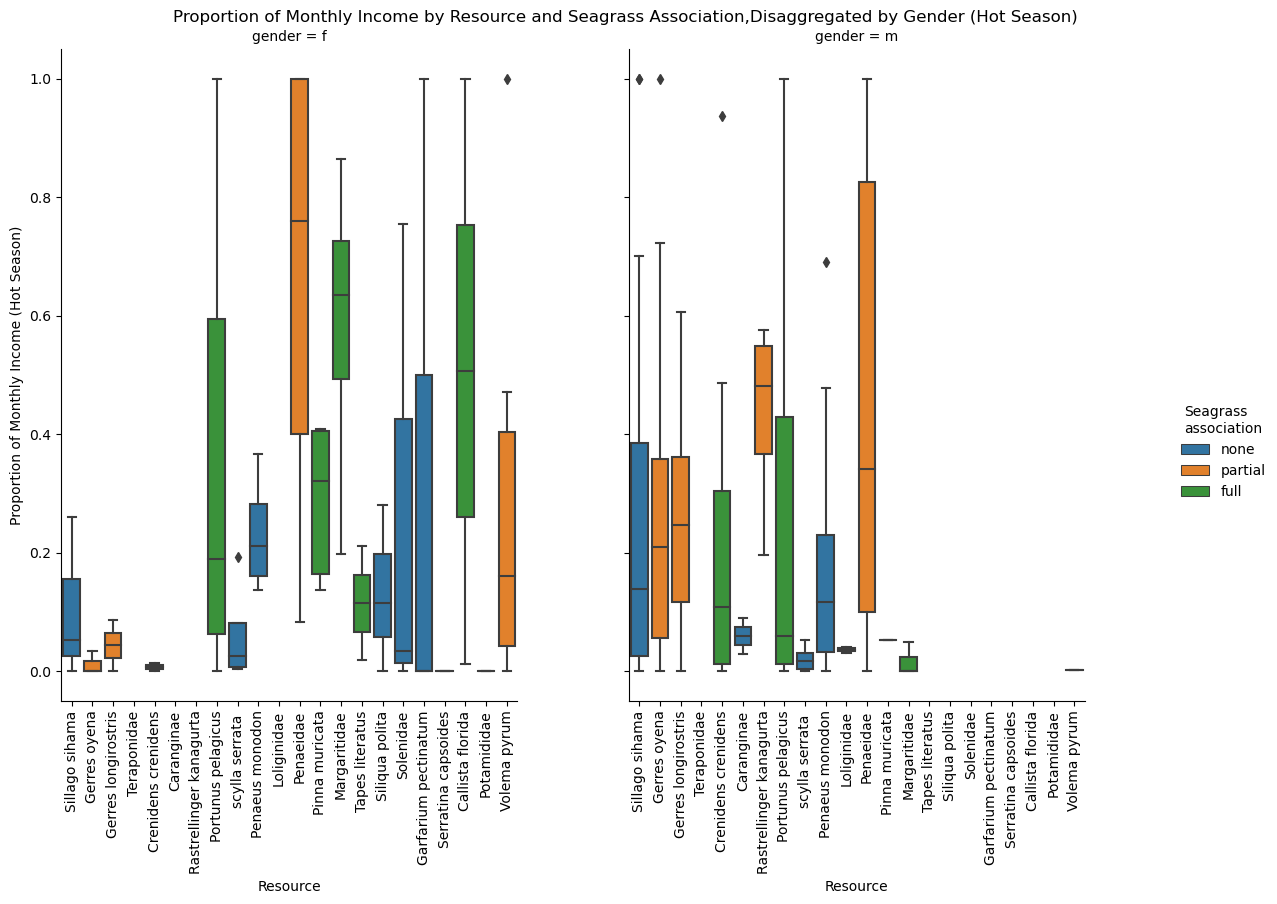

In [405]:
ax= sns.catplot(data=df, x="scientific", y="prop_income_hot", kind = 'box', col = 'gender', hue = 'Seagrass Association', dodge=False )
ax.fig.set_size_inches(13,8)
ax.set_xticklabels(rotation=90)
ax.legend.set_title('Seagrass\nAssociation')

ax.fig.suptitle('Proportion of Monthly Income by Resource and Seagrass Association,Disaggregated by Gender (Hot Season)')
ax.set_xlabels("Resource")
ax.set_ylabels("Proportion of Monthly Income (Hot Season)")
ax.legend.set_title('Seagrass\nassociation')
ax.savefig("income/income_sgCat_gender_bar_plot.png") 

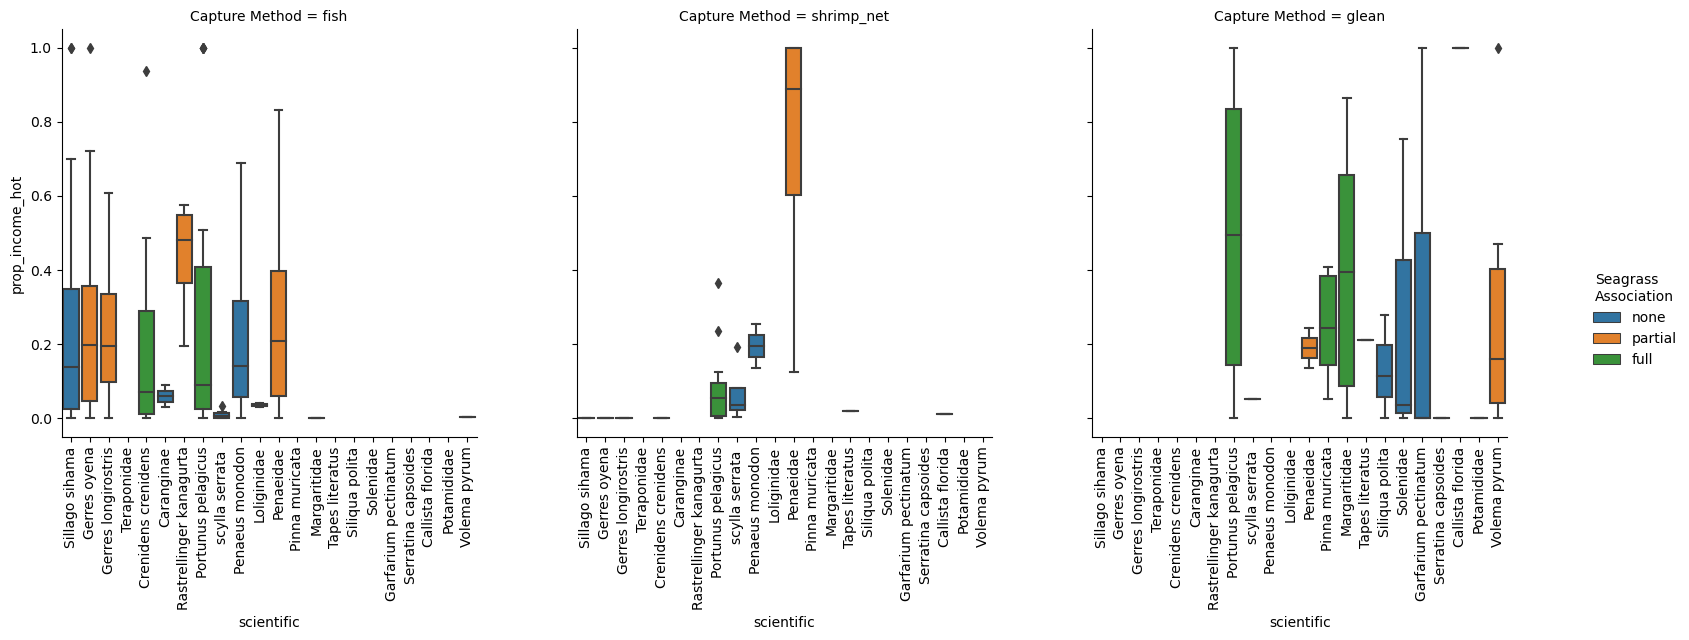

In [398]:
ax= sns.catplot(data=df, x="scientific", y="prop_income_hot", kind = 'box', col = 'Capture Method', hue = 'Seagrass Association', dodge=False )
ax.fig.set_size_inches(17,5)
ax.set_xticklabels(rotation=90)
ax.legend.set_title('Seagrass\nAssociation')

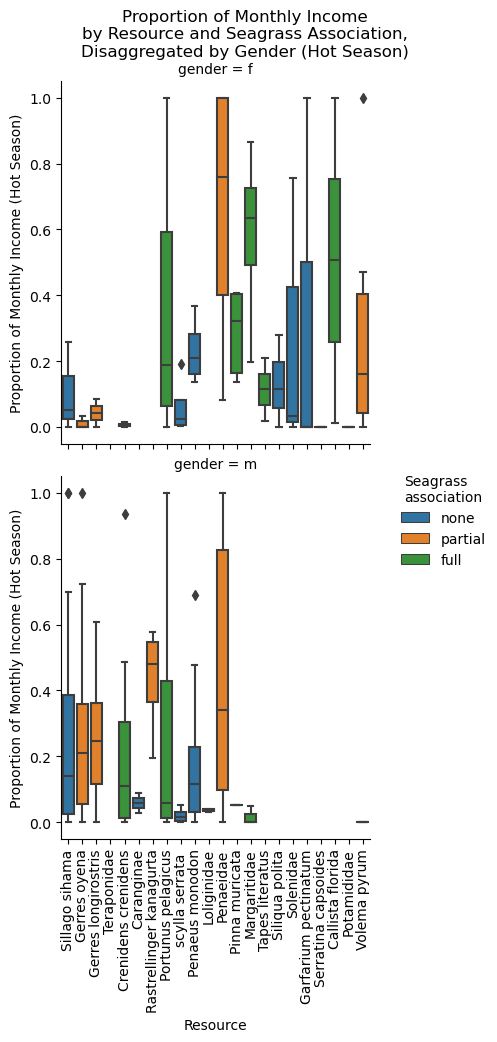

In [399]:
ax= sns.catplot(data=df, x="scientific", y="prop_income_hot", kind = 'box', row = 'gender', hue = 'Seagrass Association', dodge=False, sharex=True, sharey= True )
ax.fig.set_size_inches(5,9)

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Proportion of Monthly Income\nby Resource and Seagrass Association,\nDisaggregated by Gender (Hot Season)')
ax.set_xlabels("Resource")
ax.set_ylabels("Proportion of Monthly Income (Hot Season)")
ax.legend.set_title('Seagrass\nassociation')

ax.tick_params(axis='x', which='both', rotation=90)

ax.savefig("income/income_res_gender_box_plot.png") 

In [400]:
df_agg = df.groupby(['scientific','Capture Method']).agg(med_hot=('prop_income_hot', np.median), med_cold=('prop_income_cold', np.median),count = ('id', 'count'), Seagrass_Association= ('Seagrass Association', 'first')).reset_index() 
df_agg['weighted_av_hot'] = df_agg.apply(lambda row: weighted_av(row['Capture Method'], row['med_hot'],  row['count']), axis=1)
df_agg.scientific = pd.Categorical(df_agg.scientific,categories=['Sillago sihama', 'Gerres oyena', 
                                                        'Gerres longirostris','Teraponidae', 
                                                        'Crenidens crenidens', 'Caranginae',
                                                        'Rastrellinger kanagurta', 'Portunus pelagicus', 
                                                        'scylla serrata ','Penaeus monodon', 'Loliginidae', 
                                                        'Penaeidae', 'Pinna muricata','Margaritidae', 
                                                        'Tapes literatus', 'Siliqua polita', 'Solenidae',
                                                        'Garfarium pectinatum', 'Serratina capsoides', 
                                                        'Callista florida','Potamididae', 'Volema pyrum'],ordered=True)
df_agg

,scientific,Capture Method,med_hot,med_cold,count,Seagrass_Association,weighted_av_hot
0,Sillago sihama,fish,0.139229,0.234742,37,none,0.117079
1,Sillago sihama,shrimp_net,0.000000,0.000000,1,none,0.000000
2,Sillago sihama,glean,NaN,NaN,0,NaN,NaN
3,Gerres oyena,fish,0.196923,0.025000,21,partial,0.093986
4,Gerres oyena,shrimp_net,0.000000,0.000000,2,partial,0.000000
...,...,...,...,...,...,...,...
61,Potamididae,shrimp_net,NaN,NaN,0,NaN,NaN
62,Potamididae,glean,0.000000,0.000000,2,none,0.000000
63,Volema pyrum,fish,0.001908,0.015899,1,partial,0.000043
64,Volema pyrum,shrimp_net,NaN,NaN,0,NaN,NaN


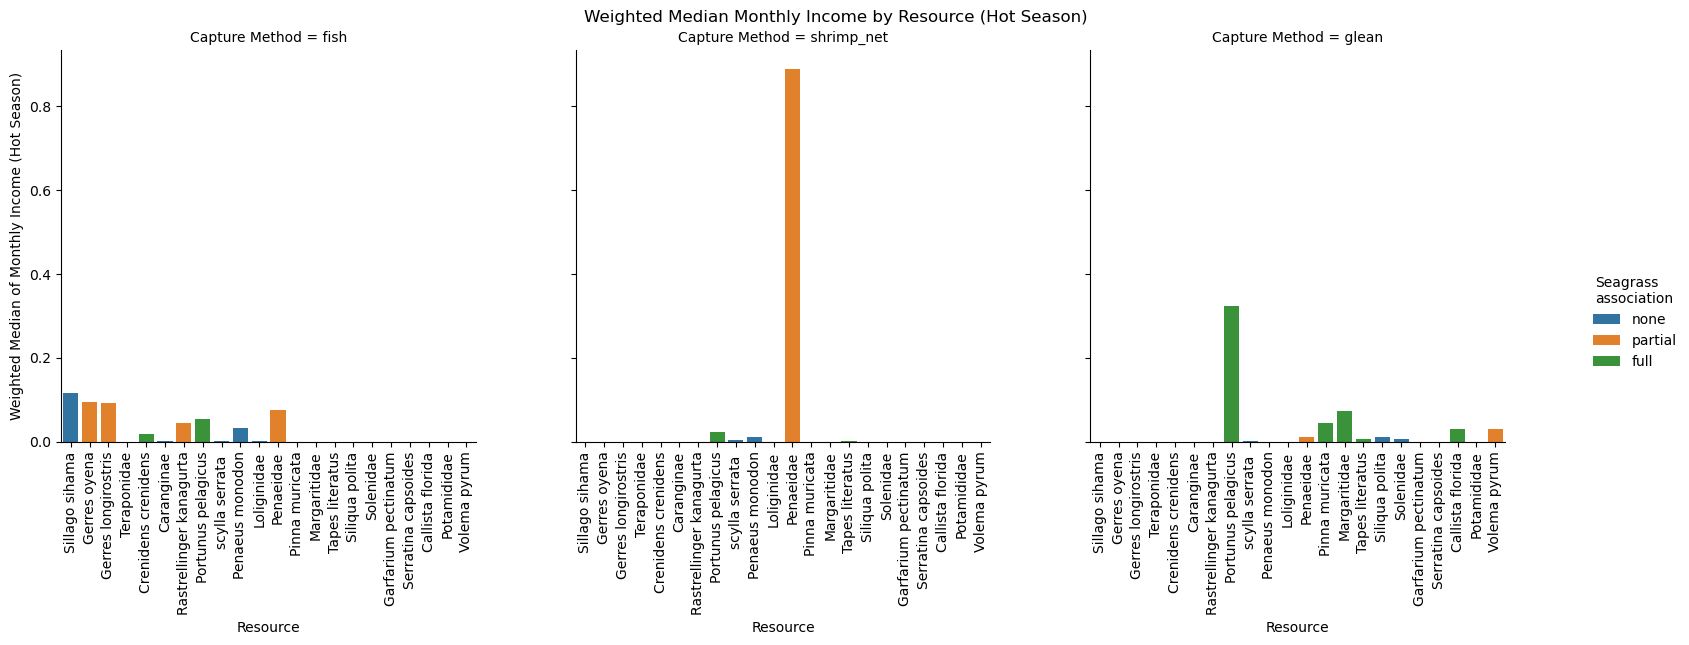

In [401]:
ax= sns.catplot(data=df_agg.sort_values(['scientific','Capture Method']), x="scientific", y="weighted_av_hot", kind = 'bar', col = 'Capture Method', hue = 'Seagrass_Association', dodge=False )
ax.fig.set_size_inches(17,5)
ax.set_xticklabels(rotation=90)

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Weighted Median Monthly Income by Resource (Hot Season)')
ax.set_xlabels("Resource")
ax.set_ylabels("Weighted Median of Monthly Income (Hot Season)")
ax.legend.set_title('Seagrass\nassociation')


ax.savefig("income/income_res_bar_plot.png") 

In [402]:
df_agg = df.groupby(['scientific','gender']).agg(med_hot=('prop_income_hot', np.median), med_cold=('prop_income_cold', np.median),count = ('id', 'count'), Seagrass_Association= ('Seagrass Association', 'first')).reset_index() 
df_agg['weighted_av_hot'] = df_agg.apply(lambda row: weighted_av(row['gender'], row['med_hot'],  row['count']), axis=1)
df_agg.scientific = pd.Categorical(df_agg.scientific,categories=['Sillago sihama', 'Gerres oyena', 
                                                        'Gerres longirostris','Teraponidae', 
                                                        'Crenidens crenidens', 'Caranginae',
                                                        'Rastrellinger kanagurta', 'Portunus pelagicus', 
                                                        'scylla serrata ','Penaeus monodon', 'Loliginidae', 
                                                        'Penaeidae', 'Pinna muricata','Margaritidae', 
                                                        'Tapes literatus', 'Siliqua polita', 'Solenidae',
                                                        'Garfarium pectinatum', 'Serratina capsoides', 
                                                        'Callista florida','Potamididae', 'Volema pyrum'],ordered=True)

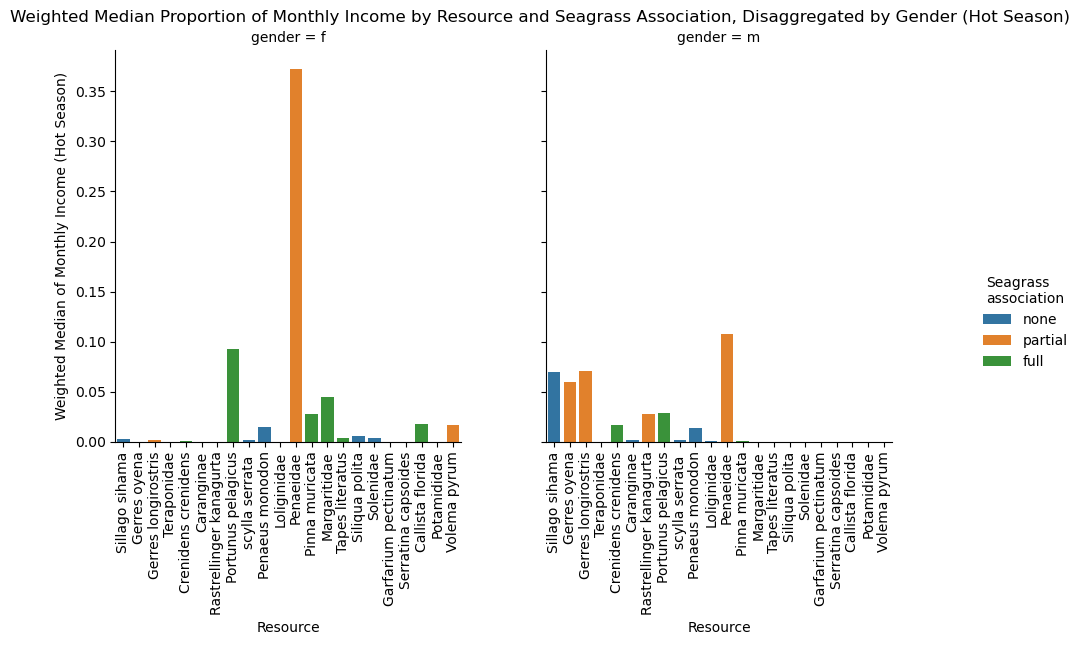

In [403]:
ax= sns.catplot(data=df_agg.sort_values(['scientific','gender']), x="scientific", y="weighted_av_hot", kind = 'bar', col = 'gender', hue = 'Seagrass_Association', dodge=False, sharex=True )
ax.fig.set_size_inches(10,5)

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Weighted Median Proportion of Monthly Income by Resource and Seagrass Association, Disaggregated by Gender (Hot Season)')
ax.set_xlabels("Resource")
ax.set_ylabels("Weighted Median of Monthly Income (Hot Season)")
ax.legend.set_title('Seagrass\nassociation')

ax.tick_params(axis='x', which='both', rotation=90)

ax.savefig("income/income_res_gender_bar_plot.png") 

## Trade

## Monthly Income from fishing

In [404]:
df.columns
df_income = df.groupby(['id', 'Capture Method']).agg({'income_hot': 'sum','income_cold': 'sum','ccp':'first'}).reset_index() 
df_income = df_income[(df_income['income_hot'] != 0)  &(df_income['income_cold'] != 0) ]

ax= sns.catplot(data=df_income, x="Capture Method", y="income_hot", kind = 'bar')



KeyError: "Column(s) ['income_cold', 'income_hot'] do not exist"

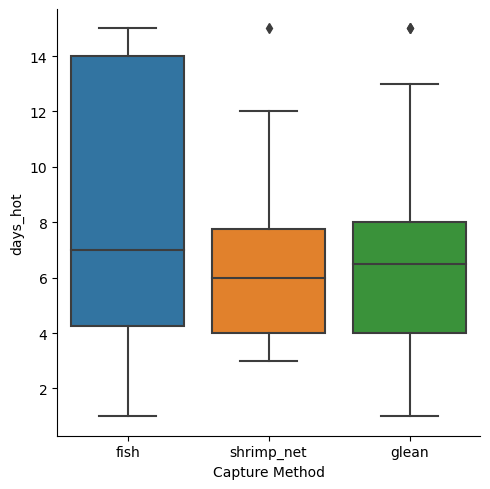

In [ ]:
df_days =df.groupby(['id', 'Capture Method']).agg({'days_hot': 'max','days_cold': 'max','ccp':'first'}).reset_index() 
df_days = df_days[(df_days['days_hot'] != 0)  &(df_days['days_hot'] != 0) ]

ax= sns.catplot(data=df_days, x="Capture Method", y="days_hot", kind = 'box')

In [ ]:
df.columns

Index(['focal_resource', 'gitonga_s', 'gitonga_p', 'portuguese', 'scientific',
       'family', 'phylum', 'category', 'focal', 'sg_dep_median',
       'Seagrass Association', 'prop_cap_hot', 'prop_cap_cold', 'days_hot',
       'days_cold', 'cap_pp_hot', 'cap_pp_cold', 'income_hot', 'income_cold',
       'trade_val_hot', 'trade_val_cold', 'resell_hot', 'resell_cold',
       'income_tot_fish_hot', 'trade_tot_hot', 'income_tot_fish_cold',
       'trade_tot_cold', 'income_resell_hot', 'income_resell_cold',
       'activity_income_hot', 'activity_income_cold', 'prop_income_hot',
       'prop_income_cold', 'prop_income_from_trade_hot',
       'prop_income_from_trade_cold', 'id', 'ccp', 'gender', 'fish_pract',
       'Capture Method'],
      dtype='object')